In [1]:
# Mini embudo con fashion mnist

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

2025-09-22 11:58:49.827298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758542329.858522 2904326 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758542329.868360 2904326 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758542329.891817 2904326 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758542329.891840 2904326 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758542329.891843 2904326 computation_placer.cc:177] computation placer alr

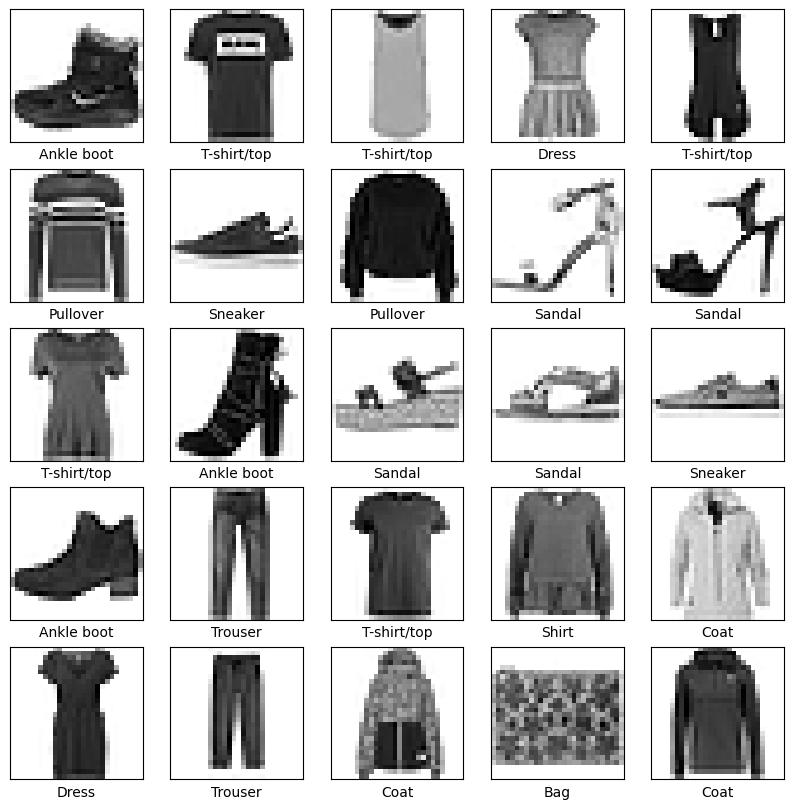

In [2]:
# ejemplos aleatorios del dataset

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Embudo


3 (conv-maxpooling), flat, densa y salida.

### Probar

- Haciendo el MaxPooling con una Conv2D y los strides
- Haciendo un AvgPooling

In [3]:
# 

input_layer = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(input_layer)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(8, activation='relu')(x)
output_layer = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model.summary()

I0000 00:00:1758542336.249295 2904326 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 45964 MB memory:  -> device: 0, name: Quadro RTX 8000, pci bus id: 0000:37:00.0, compute capability: 7.5
I0000 00:00:1758542336.252744 2904326 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 8162 MB memory:  -> device: 1, name: Quadro RTX 8000, pci bus id: 0000:86:00.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         4,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,002 (109.38 KB)

 Trainable params: 28,002 (109.38 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # etiquetas como números, no onehot
              metrics=['accuracy']
            )

history = model.fit(train_images, train_labels, validation_split = 0.2, epochs=20)

Epoch 1/20


I0000 00:00:1758542341.513505 2904589 service.cc:152] XLA service 0x707d680024e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758542341.513550 2904589 service.cc:160]   StreamExecutor device (0): Quadro RTX 8000, Compute Capability 7.5
I0000 00:00:1758542341.513562 2904589 service.cc:160]   StreamExecutor device (1): Quadro RTX 8000, Compute Capability 7.5
I0000 00:00:1758542341.946151 2904589 cuda_dnn.cc:529] Loaded cuDNN version 91002


  60/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2306 - loss: 2.1324

I0000 00:00:1758542344.605219 2904589 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6541 - loss: 0.9807 - val_accuracy: 0.8343 - val_loss: 0.4750
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8352 - loss: 0.4566 - val_accuracy: 0.8603 - val_loss: 0.4031
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8673 - loss: 0.3711 - val_accuracy: 0.8588 - val_loss: 0.3831
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8810 - loss: 0.3313 - val_accuracy: 0.8851 - val_loss: 0.3243
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8925 - loss: 0.3009 - val_accuracy: 0.8900 - val_loss: 0.3133
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9001 - loss: 0.2753 - val_accuracy: 0.8977 - val_loss: 0.2874
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9058 - loss: 0.2624 - val_accuracy: 0.8972 - val_loss: 0.2885
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9106 - loss: 0.2451 - val_accura

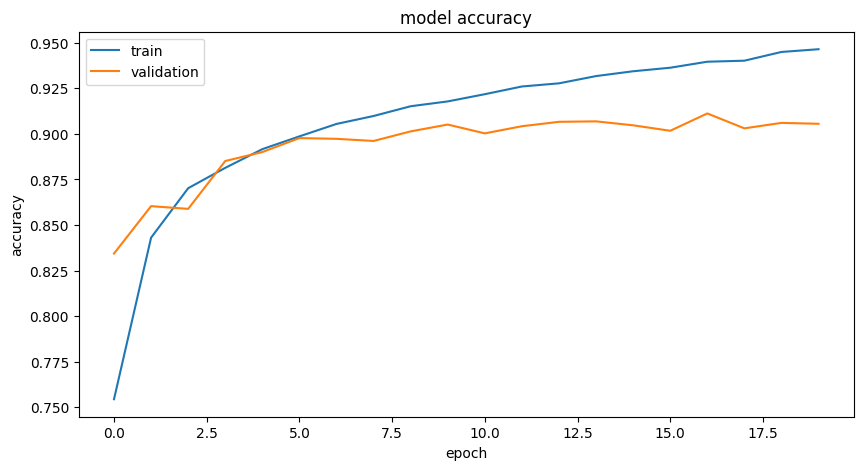

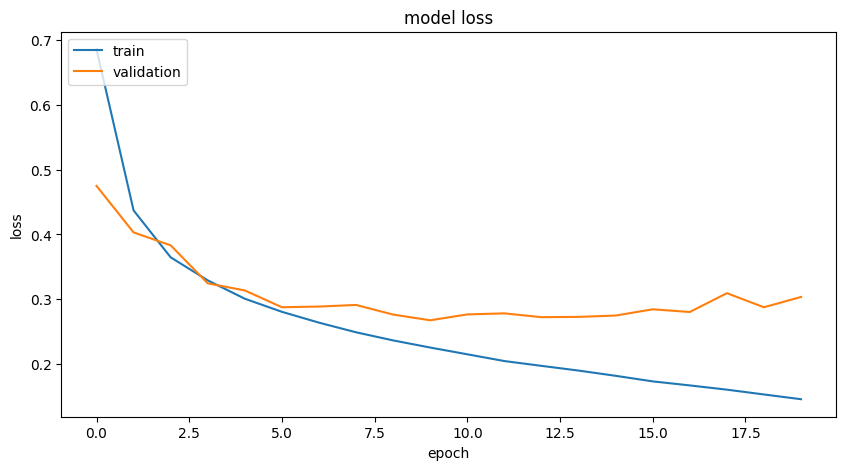

In [5]:
def plot_metric(data, what):
  plt.figure(figsize=(10, 5))
  plt.plot(data[what])
  plt.plot(data['val_' + what])
  plt.title('model ' + what)
  plt.ylabel(what)
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')

plot_metric(history.history, 'accuracy')
plot_metric(history.history, 'loss')

In [6]:
# Evaluamos cómo ha ido en test
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - 8ms/step - accuracy: 0.9024 - loss: 0.3158


---

Creado por **Jorge Dueñas Lerín**(jorge.duenas.lerin@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">